In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(10, 6))
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
matplotlib.rcParams["figure.figsize"]=[20,10]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
Data = pd.read_csv("C:/Users/rakes/Downloads/online+news+popularity/OnlineNewsPopularity/OnlineNewsPopularity.csv")
Data.head()

In [16]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [48]:
Data = Data[Data[' n_tokens_content'] >= 1]

In [49]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,38463.0,360.385747,212.773031,8.000000,174.000000,347.000000,547.000000,731.000000
n_tokens_title,38463.0,10.382419,2.113800,2.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,38463.0,563.295375,468.299538,18.000000,259.000000,423.000000,729.000000,8474.000000
n_unique_tokens,38463.0,0.565049,3.573022,0.114964,0.477419,0.542986,0.611111,701.000000
n_non_stop_words,38463.0,1.027065,5.307978,1.000000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,38463.0,0.710336,3.312293,0.119134,0.632588,0.693727,0.756944,650.000000
num_hrefs,38463.0,11.217872,11.340580,0.000000,5.000000,8.000000,14.000000,304.000000
num_self_hrefs,38463.0,3.394769,3.869773,0.000000,1.000000,3.000000,4.000000,116.000000
num_imgs,38463.0,4.563061,8.295365,0.000000,1.000000,1.000000,4.000000,128.000000
num_videos,38463.0,1.263786,4.164896,0.000000,0.000000,0.000000,1.000000,91.000000


In [50]:
Data.isnull().sum().sum()

0

In [51]:
Data.duplicated().sum()

0

In [52]:
 Data[' shares'].value_counts()

1100     2250
1200     1962
1300     1691
1400     1552
1500     1288
         ... 
54100       1
38400       1
47400       1
376         1
45000       1
Name:  shares, Length: 1435, dtype: int64

In [53]:
Data.dropna()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,combined_channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,bus
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,bus
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,tech
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,socmed
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,lifestyle
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,lifestyle


In [54]:
Data = Data.drop_duplicates()

In [55]:
Data.shape

(38463, 62)

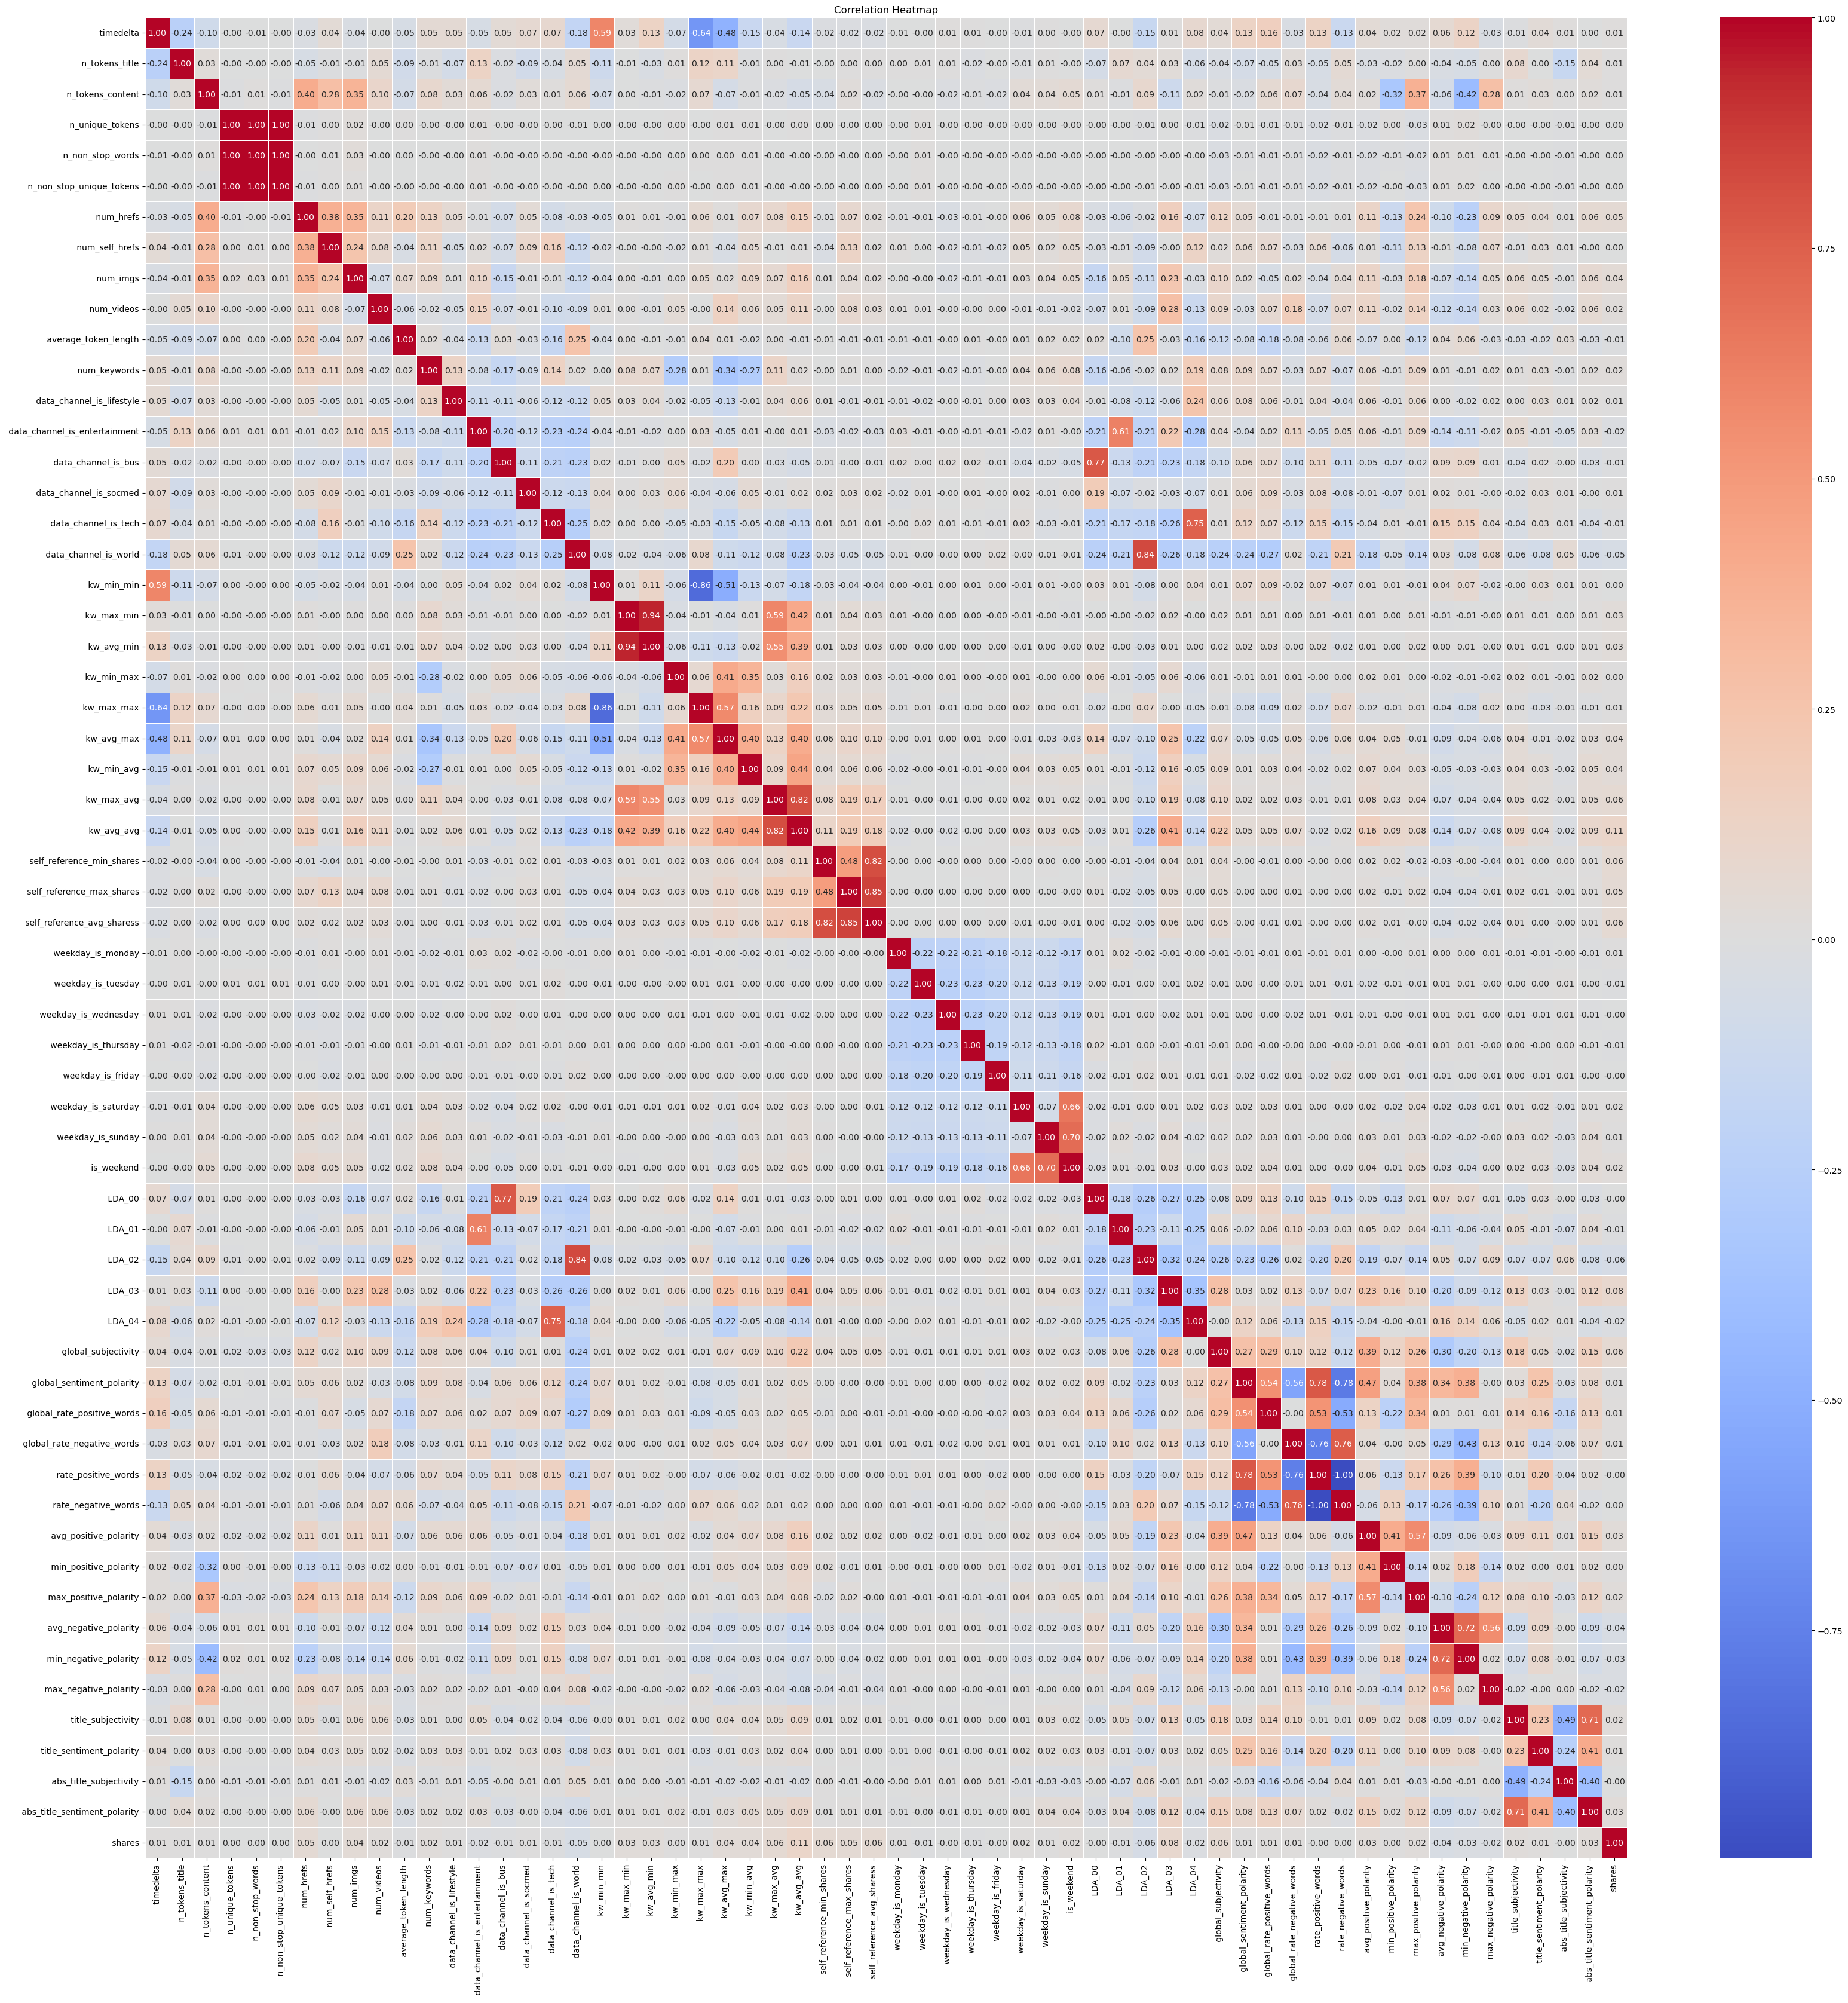

In [56]:
correlation_matrix = Data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

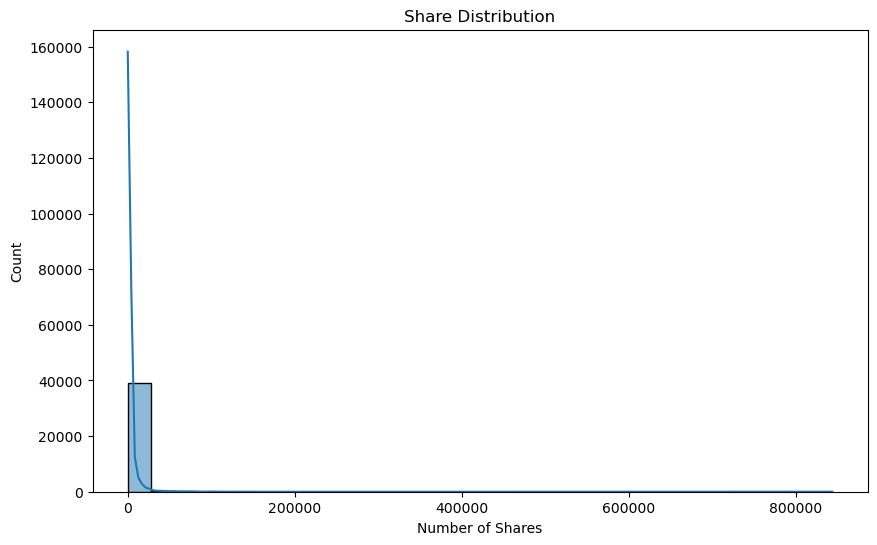

In [244]:
plt.figure(figsize=(10, 6))
sns.histplot(Data[' shares'], bins=30, kde=True)
plt.title('Share Distribution')
plt.xlabel('Number of Shares')
plt.show()

In [245]:
correlation_shares_imgs = Data[' shares'].corr(Data[' num_imgs'])
print(f"Correlation between 'shares' and 'num_imgs': {correlation_shares_imgs}")

Correlation between 'shares' and 'num_imgs': 0.039387597847628644


In [246]:
Data.groupby(' n_tokens_title')[' shares'].sum()#.reset_index()

 n_tokens_title
2         1400
3         6400
4        68904
5       581275
6      2439583
7      7136578
8     14048628
9     21331266
10    23543584
11    24673799
12    17980886
13    12300816
14     6428928
15     2278784
16     1202815
17      423657
18       86715
19       63022
20        2812
23        6600
Name:  shares, dtype: int64

In [21]:
Data.groupby(' n_tokens_title')[' shares'].mean()

 n_tokens_title
2.0      1400.000000
3.0      1280.000000
4.0      2460.857143
5.0      3159.103261
6.0      3030.537888
7.0      3366.310377
8.0      3323.545777
9.0      3397.780503
10.0     3199.726013
11.0     3545.086063
12.0     3393.260238
13.0     3505.504702
14.0     3709.710329
15.0     3014.264550
16.0     4644.073359
17.0     4655.571429
18.0     3941.590909
19.0    10503.666667
20.0     1406.000000
23.0     6600.000000
Name:  shares, dtype: float64

In [22]:
 Data[' n_tokens_title'].value_counts()

10.0    7358
11.0    6960
9.0     6278
12.0    5299
8.0     4227
13.0    3509
7.0     2120
14.0    1733
6.0      805
15.0     756
16.0     259
5.0      184
17.0      91
4.0       28
18.0      22
19.0       6
3.0        5
20.0       2
2.0        1
23.0       1
Name:  n_tokens_title, dtype: int64

In [57]:
Data.groupby(' n_tokens_content')[' shares'].sum()#.reset_index()

 n_tokens_content
18.0       6500
21.0       3000
22.0       7200
24.0       1000
25.0       5100
          ...  
7081.0      748
7185.0     3000
7413.0     2300
7764.0     1300
8474.0    20400
Name:  shares, Length: 2405, dtype: int64

In [58]:
Data.groupby(' n_tokens_content')[' shares'].mean()

 n_tokens_content
18.0       6500.0
21.0       3000.0
22.0       7200.0
24.0       1000.0
25.0       5100.0
           ...   
7081.0      748.0
7185.0     3000.0
7413.0     2300.0
7764.0     1300.0
8474.0    20400.0
Name:  shares, Length: 2405, dtype: float64

In [59]:
 Data[' n_tokens_content'].value_counts()

286.0     101
225.0      86
335.0      86
279.0      85
242.0      84
         ... 
2611.0      1
2309.0      1
3320.0      1
1664.0      1
2509.0      1
Name:  n_tokens_content, Length: 2405, dtype: int64

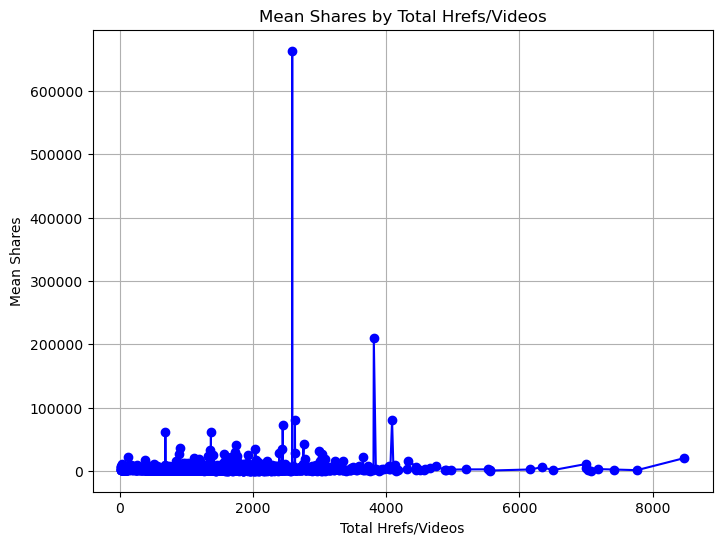

In [69]:
shares_by_cont = Data.groupby(' n_tokens_content')[' shares'].mean()

# Creating a line graph
plt.figure(figsize=(8, 6))
shares_by_cont.plot(kind='line', color='blue', marker='o')
plt.title('Mean Shares by Total Hrefs/Videos')
plt.xlabel('Total Hrefs/Videos')
plt.ylabel('Mean Shares')
plt.grid(True)
plt.show()

In [23]:
Data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

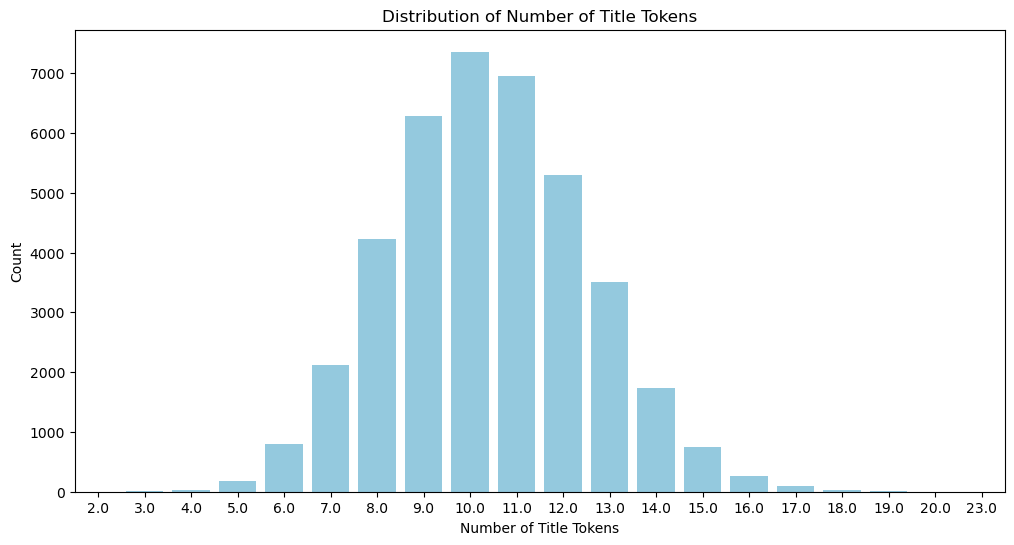

In [24]:
title_token_counts = Data[' n_tokens_title'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=title_token_counts.index, y=title_token_counts.values, color='skyblue')
plt.title('Distribution of Number of Title Tokens')
plt.xlabel('Number of Title Tokens')
plt.ylabel('Count')
plt.show()

In [25]:
selected_columns = [' shares', ' n_tokens_title', ' num_imgs', ' data_channel_is_lifestyle', ' global_sentiment_polarity']
selected_data = Data[selected_columns]

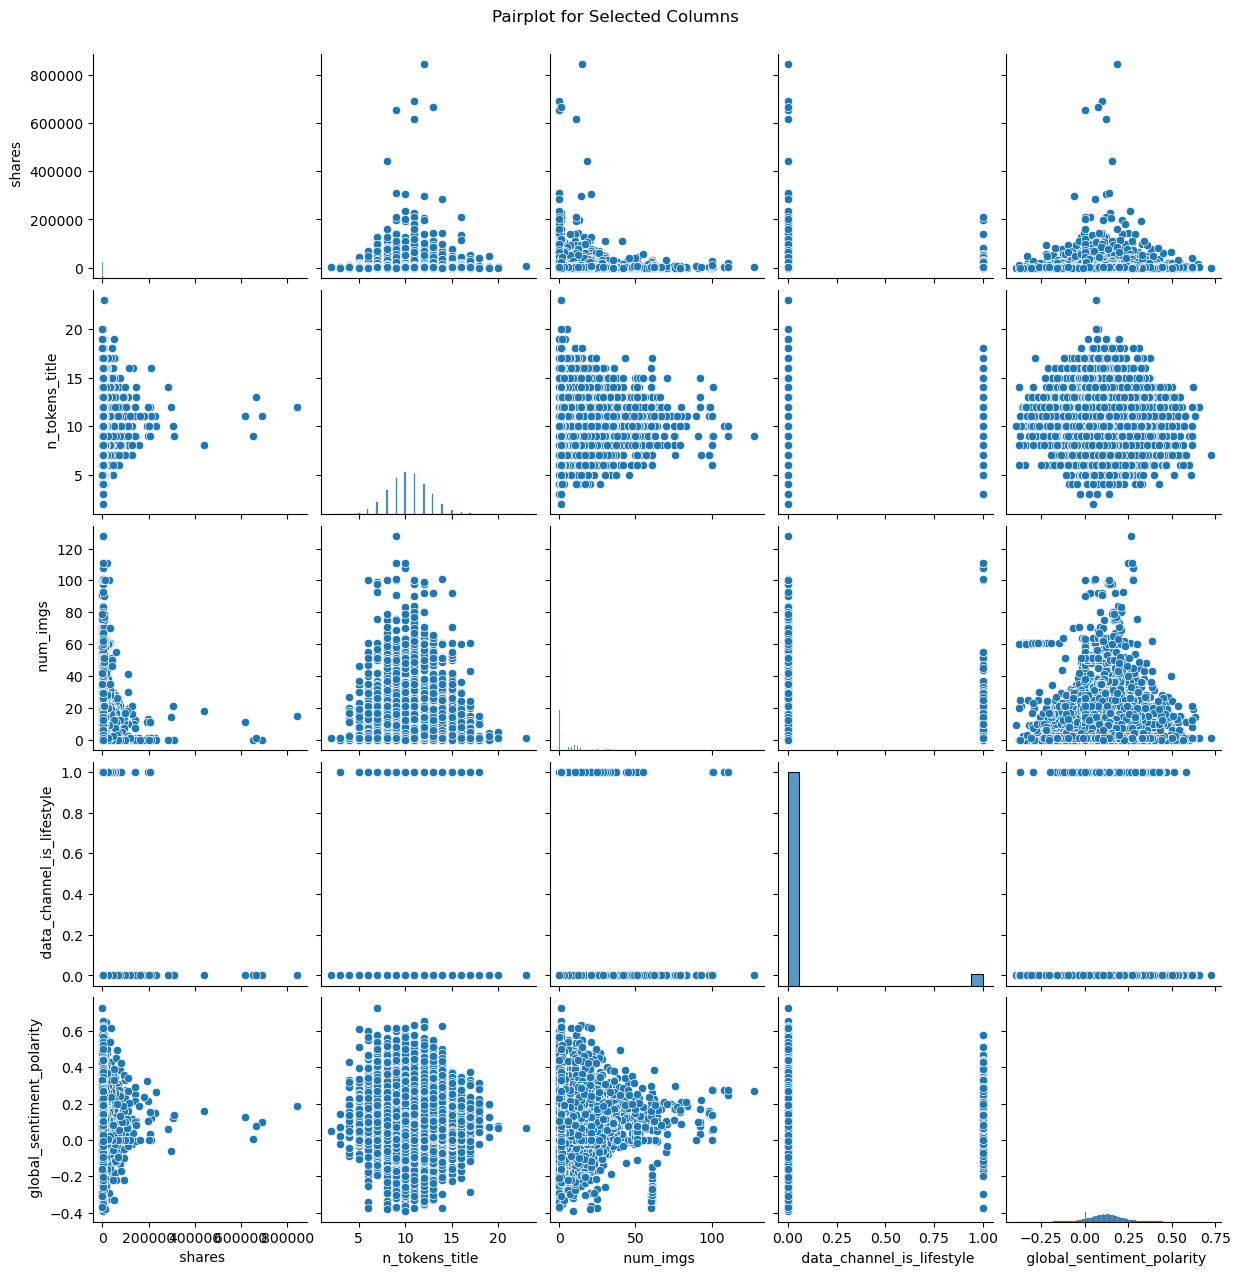

In [26]:
sns.pairplot(selected_data)
plt.suptitle('Pairplot for Selected Columns', y=1.02)
plt.show()

In [27]:
Data[' shares'].count()

39644

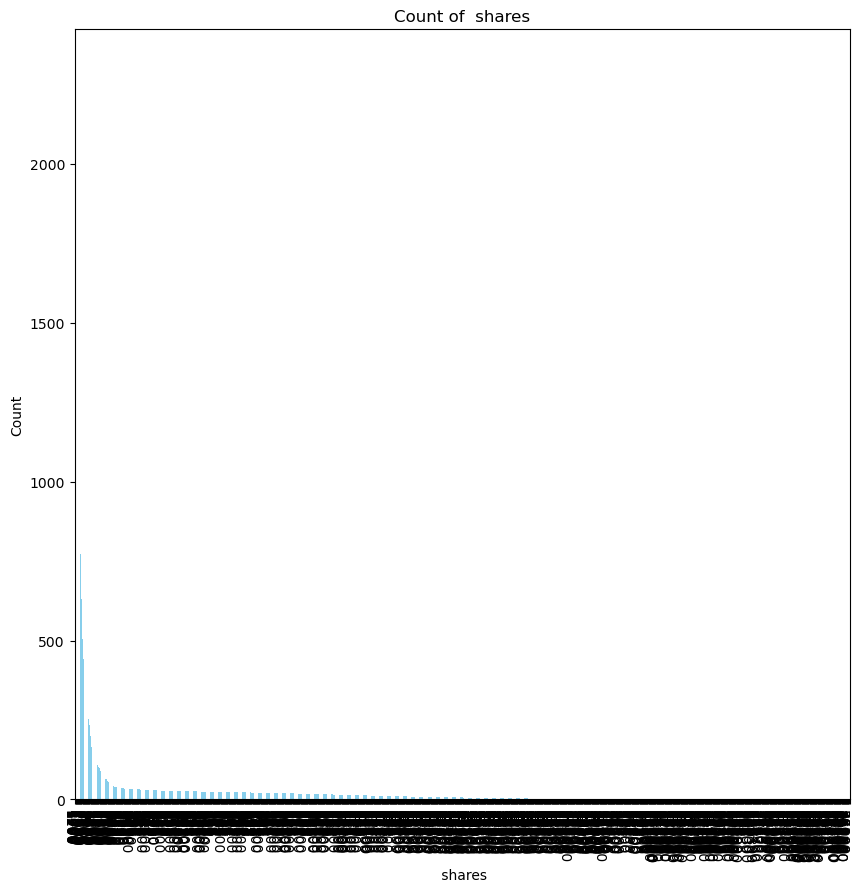

In [28]:
Data_channel_counts = Data[' shares'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10,10 ))
Data_channel_counts.plot(kind='bar', color='skyblue')
plt.title('Count of  shares')
plt.xlabel(' shares')
plt.ylabel('Count')
plt.xticks(rotation=270, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

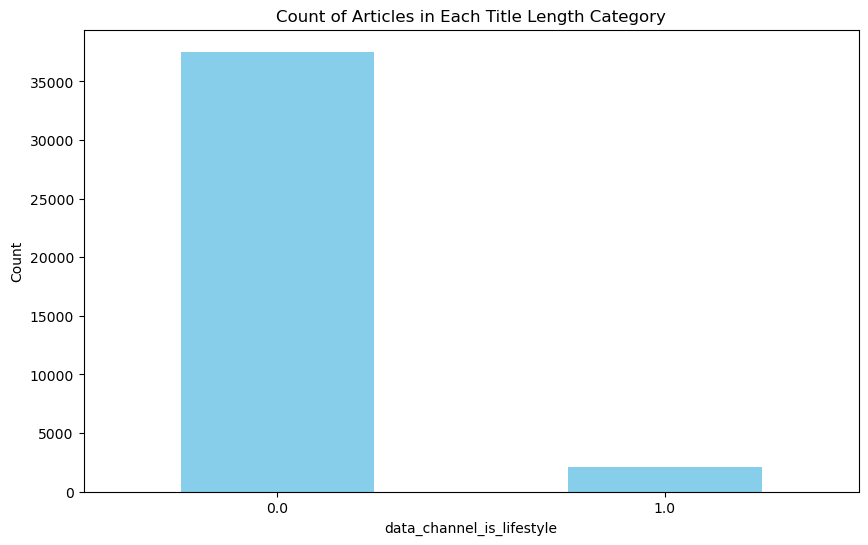

In [29]:
count_for_channel_lifestyle = Data[' data_channel_is_lifestyle'].value_counts()
plt.figure(figsize=(10, 6))
count_for_channel_lifestyle.sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Articles in Each Title Length Category')
plt.xlabel('data_channel_is_lifestyle')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [30]:
Data.columns[13:18]

Index([' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech'],
      dtype='object')

In [31]:
Data['combined_channel'] = Data[Data.columns[13:18]].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

In [33]:
Data['combined_channel'].value_counts()

lifestyle        16660
tech              7346
entertainment     7057
bus               6258
socmed            2323
Name: combined_channel, dtype: int64

In [35]:
Data.groupby('combined_channel')[' shares'].mean()

combined_channel
bus              3063.018536
entertainment    2970.487034
lifestyle        3810.042317
socmed           3629.383125
tech             3072.283283
Name:  shares, dtype: float64

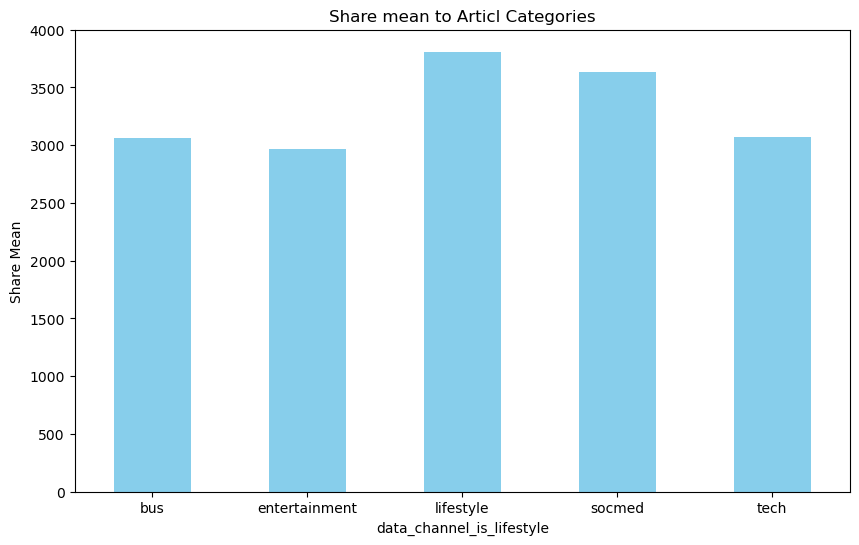

In [37]:
plt.figure(figsize=(10, 6))
Data.groupby('combined_channel')[' shares'].mean().plot(kind='bar', color='skyblue')
plt.title('Share mean to Articl Categories')
plt.xlabel('data_channel_is_lifestyle')
plt.ylabel('Share Mean')
plt.xticks(rotation=0)
plt.show()

In [257]:
Data[Data.columns[1:11]].describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000


In [258]:
Data[Data.columns[12:22]].describe()

,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967
std,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,660.000000,235.500000
75%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1000.000000,357.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,377.000000,298400.000000,42827.857140


In [259]:
Data[Data.columns[22:33]]

,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday
0,0,0,0.0000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1,0
1,0,0,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0
2,0,0,0.0000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1,0
3,0,0,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0
4,0,0,0.0000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1,0
...,...,...,...,...,...,...,...,...,...,...,...
39639,26900,843300,374962.5000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333330,0,0
39640,6500,843300,192985.7143,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0,0
39641,6200,843300,295850.0000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0,0
39642,0,843300,254600.0000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0,0


In [260]:
Data[Data.columns[33:44]]

,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123
1,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001
2,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188
3,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572
4,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427
...,...,...,...,...,...,...,...,...,...,...,...
39639,1,0,0,0,0,0,0.025038,0.025001,0.151701,0.025000,0.773260
39640,1,0,0,0,0,0,0.029349,0.028575,0.231866,0.681635,0.028575
39641,1,0,0,0,0,0,0.159004,0.025025,0.025207,0.643794,0.146970
39642,1,0,0,0,0,0,0.040004,0.040003,0.839987,0.040002,0.040004


In [261]:
Data[Data.columns[44:55]]

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity
0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600
1,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125
2,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800
3,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600
4,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500
...,...,...,...,...,...,...,...,...,...,...,...
39639,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500
39640,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400
39641,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800
39642,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500


In [262]:
Data[Data.columns[50:61]]

,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...
39639,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [263]:
Data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [79]:
Data['combine_data_for_days'] = Data[Data.columns[31:38]].idxmax(axis=1).apply(lambda x: x.split('_')[-1])
Data['combine_data_for_days']

0           monday
1           monday
2           monday
3           monday
4           monday
           ...    
39639    wednesday
39640    wednesday
39641    wednesday
39642    wednesday
39643    wednesday
Name: combine_data_for_days, Length: 38463, dtype: object

In [78]:
Data['total_tokens'] = Data[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens']].mean(axis=1)
Data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,combined_channel,total_href_vid,total_global_val,combine_values,Avg_LDA,total_tokens
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.187500,0.000000,0.187500,593,entertainment,7.0,0.168385,4.840183,0.2,46.695796
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,711,bus,5.0,0.137254,4.456863,0.2,53.279338
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,1500,bus,5.0,0.272977,5.196682,0.2,44.447799
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.000000,0.500000,0.000000,1200,entertainment,10.0,0.148175,5.702448,0.2,108.433885
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.136364,0.045455,0.136364,505,tech,58.0,0.220315,5.841418,0.2,217.391307


In [266]:
average_title_sentiment_polarity = Data[' title_sentiment_polarity'].mean()
print(average_title_sentiment_polarity)

0.07142543195545352


In [77]:
# Assuming 'Data' is your DataFrame
# Replace 'Data' with the actual variable name of your DataFrame

# Specify columns to combine into a single column
Data['Avg_LDA'] =Data[[' LDA_00', ' LDA_01', ' LDA_02',' LDA_03', ' LDA_04']].mean(axis=1)


In [62]:
Data['total_href_vid'] = Data[[' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']].sum(axis=1)

In [63]:
Data.groupby('total_href_vid')[' shares'].mean()

total_href_vid
0.0       2146.333333
1.0       2213.864407
2.0       2715.464706
3.0       4146.188277
4.0       3506.952226
             ...     
231.0    10400.000000
241.0      681.000000
250.0     2000.000000
285.0    13600.000000
311.0     6500.000000
Name:  shares, Length: 190, dtype: float64

In [70]:
Data['total_href_vid'].describe()

count    38463.000000
mean        20.439487
std         18.798855
min          0.000000
25%          9.000000
50%         14.000000
75%         26.000000
max        311.000000
Name: total_href_vid, dtype: float64

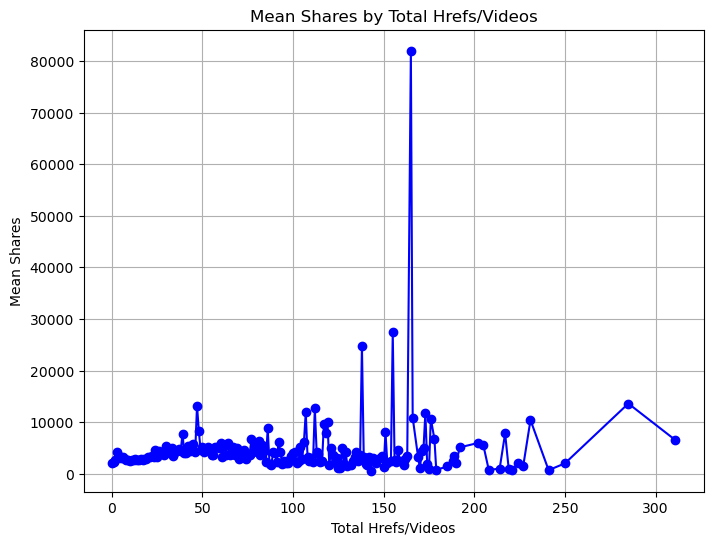

In [68]:
shares_by_total_href_vid = Data.groupby('total_href_vid')[' shares'].mean()

# Creating a line graph
plt.figure(figsize=(8, 6))
shares_by_total_href_vid.plot(kind='line', color='blue', marker='o')
plt.title('Mean Shares by Total Hrefs/Videos')
plt.xlabel('Total Hrefs/Videos')
plt.ylabel('Mean Shares')
plt.grid(True)
plt.show()

In [72]:
Data['total_href_vid'].describe()

count    38463.000000
mean        20.439487
std         18.798855
min          0.000000
25%          9.000000
50%         14.000000
75%         26.000000
max        311.000000
Name: total_href_vid, dtype: float64

In [73]:
Data['total_global_val'] = Data[[ ' global_subjectivity',' global_sentiment_polarity', ' global_rate_positive_words',' global_rate_negative_words']].mean(axis=1)
                                 

In [74]:
Data[' combine_values'] = Data[[' average_token_length',' num_keywords']].mean(axis=1)                                 

In [75]:
Data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [80]:
# Specify columns to include in the new DataFrame
columns_to_include = ['combine_data_for_days', ' self_reference_avg_sharess',' kw_avg_avg',' avg_negative_polarity',' avg_positive_polarity','total_tokens', ' combine_values', 'Avg_LDA','total_href_vid', 'total_global_val','url', ' timedelta','combined_channel', ' shares']

# Create a new DataFrame with selected columns
df = Data[columns_to_include].copy()

# Display the new DataFrame
print("\nNew DataFrame:")
print(df.head())




New DataFrame:
  combine_data_for_days   self_reference_avg_sharess   kw_avg_avg  \
0                monday                   496.000000          0.0   
1                monday                     0.000000          0.0   
2                monday                   918.000000          0.0   
3                monday                     0.000000          0.0   
4                monday                  3151.157895          0.0   

    avg_negative_polarity   avg_positive_polarity  total_tokens  \
0               -0.350000                0.378636     46.695796   
1               -0.118750                0.286915     53.279338   
2               -0.466667                0.495833     44.447799   
3               -0.369697                0.385965    108.433885   
4               -0.220192                0.411127    217.391307   

    combine_values  Avg_LDA  total_href_vid  total_global_val  \
0         4.840183      0.2             7.0          0.168385   
1         4.456863      0.2         

In [81]:
corr_matrix = df.corr()

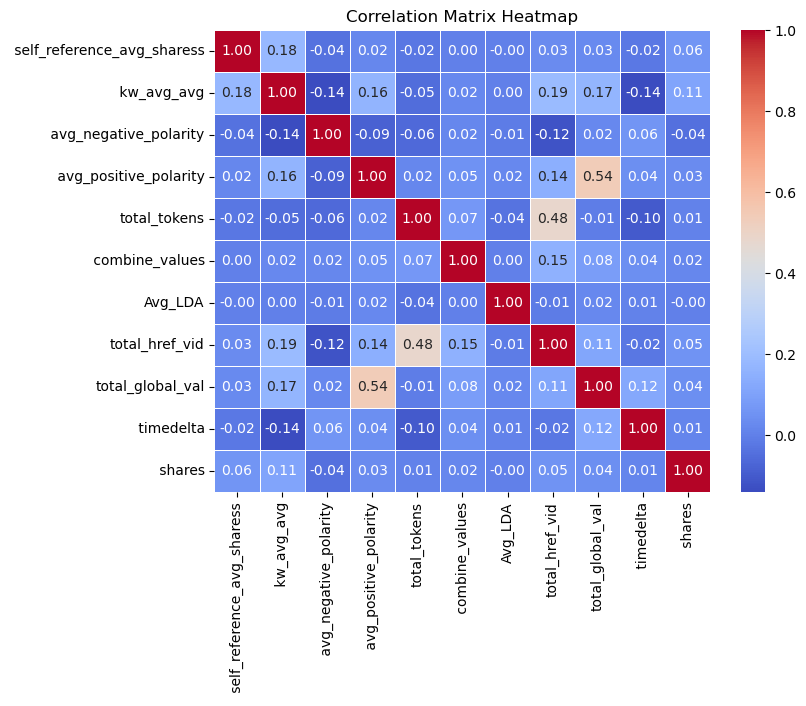

In [82]:


# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [88]:
Data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,combined_channel,total_href_vid,total_global_val,combine_values,Avg_LDA,total_tokens,combine_data_for_days
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.000000,0.187500,593,entertainment,7.0,0.168385,4.840183,0.2,46.695796,monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.500000,0.000000,711,bus,5.0,0.137254,4.456863,0.2,53.279338,monday
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.500000,0.000000,1500,bus,5.0,0.272977,5.196682,0.2,44.447799,monday
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.500000,0.000000,1200,entertainment,10.0,0.148175,5.702448,0.2,108.433885,monday
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.045455,0.136364,505,tech,58.0,0.220315,5.841418,0.2,217.391307,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.400000,0.000000,1800,tech,18.0,0.169166,6.261561,0.2,71.842767,wednesday
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.200000,1.000000,1900,socmed,67.0,0.201851,5.702744,0.2,68.516271,wednesday
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.045455,0.136364,1900,lifestyle,38.0,0.148432,6.538462,0.2,90.832097,wednesday
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.500000,0.000000,1100,lifestyle,12.0,0.098625,4.987537,0.2,138.046431,wednesday


In [87]:
Data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [95]:
df1=Data[[' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares', 'combined_channel',
       'total_href_vid', 'total_global_val', ' combine_values', 'Avg_LDA',
       'total_tokens', 'combine_data_for_days']]

In [96]:
# Using Pandas' get_dummies function
df1 = pd.get_dummies(df1, columns=['combine_data_for_days','combined_channel'])

C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

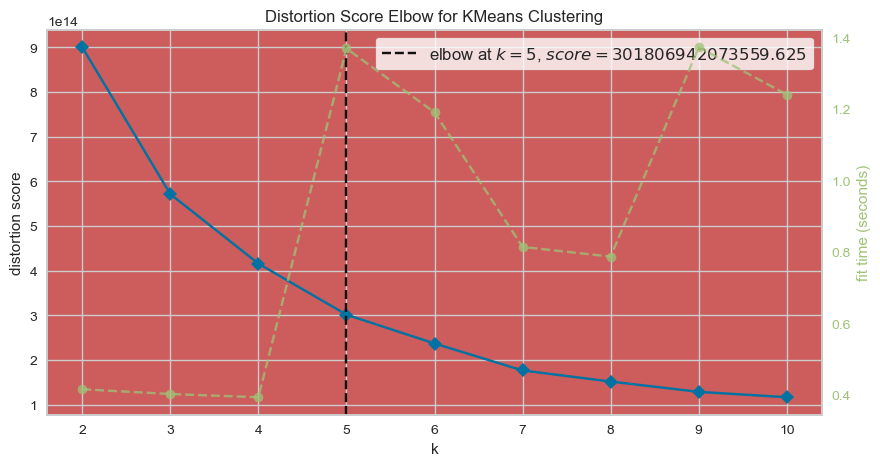

Therefore K = 5


In [97]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(df1)
Elbow_M.show()
print("Therefore K = 5")

In [98]:
kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(df1)

C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [99]:
df1["Clusters"]=kmeans.labels_

In [103]:
print("Silhouette score :",silhouette_score(df1, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.5473796478565717


In [275]:
label_encoder = LabelEncoder()

In [276]:
# Convert 'combine_data_for_days' column to numerical
df['convert_data_for_days_numerical'] = label_encoder.fit_transform(df['combine_data_for_days'])

# Convert 'combined_channel' column to numerical
df['convert_channel_numerical'] = label_encoder.fit_transform(df['combined_channel'])

# Display the updated dataframe
print(df[['combine_data_for_days', 'convert_data_for_days_numerical', 'combined_channel', 'convert_channel_numerical']].head())

  combine_data_for_days  convert_data_for_days_numerical combined_channel  \
0                monday                                1    entertainment   
1                monday                                1              bus   
2                monday                                1              bus   
3                monday                                1    entertainment   
4                monday                                1             tech   

   convert_channel_numerical  
0                          1  
1                          0  
2                          0  
3                          1  
4                          4  


In [277]:
df=df.drop(['combined_channel','combine_data_for_days','url'],axis=1)

In [278]:
df

,self_reference_avg_sharess,kw_avg_avg,avg_negative_polarity,avg_positive_polarity,total_tokens,combine_values,Avg_LDA,total_href_vid,total_global_val,timedelta,shares,convert_data_for_days_numerical,convert_channel_numerical
0,496.000000,0.000000,-0.350000,0.378636,46.695796,4.840183,0.2,7,0.168385,731,593,1,1
1,0.000000,0.000000,-0.118750,0.286915,53.279338,4.456863,0.2,5,0.137254,731,711,1,0
2,918.000000,0.000000,-0.466667,0.495833,44.447799,5.196682,0.2,5,0.272977,731,1500,1,0
3,0.000000,0.000000,-0.369697,0.385965,108.433885,5.702448,0.2,10,0.148175,731,1200,1,1
4,3151.157895,0.000000,-0.220192,0.411127,217.391307,5.841418,0.2,58,0.220315,731,505,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,37033.333330,3031.115764,-0.260000,0.333791,71.842767,6.261561,0.2,18,0.169166,8,1800,6,4
39640,2100.000000,3411.660830,-0.211111,0.374825,68.516271,5.702744,0.2,67,0.201851,8,1900,6,3
39641,1400.000000,4206.439195,-0.356439,0.307273,90.832097,6.538462,0.2,38,0.148432,8,1900,6,2
39642,452.000000,1777.895883,-0.205246,0.236851,138.046431,4.987537,0.2,12,0.098625,8,1100,6,2


In [220]:
Data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,1.0,0.692661,10,1,1,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [305]:
data=Data.drop(['combined_channel','combine_data_for_days','url'],axis=1)

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  int64  
 1    n_tokens_title                 39644 non-null  int64  
 2    n_tokens_content               39644 non-null  int64  
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  int64  
 7    num_self_hrefs                 39644 non-null  int64  
 8    num_imgs                       39644 non-null  int64  
 9    num_videos                     39644 non-null  int64  
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  int64  
 12   data_channel_is_lifestyle      

In [125]:
conditions = [
    (df[' shares'] <= 2500),
    (df[' shares'] > 2500) & (df[' shares'] < 7500),
    (df[' shares'] >= 7500)
]

values = [1, 2, 3]
df[' shares'] = np.select(conditions, values)
print(df[' shares'])


0        1
1        1
2        1
3        1
4        1
        ..
39639    1
39640    1
39641    1
39642    1
39643    1
Name:  shares, Length: 39644, dtype: int64


In [307]:
conditions = [
    (data[' shares'] <= 2500),
    (data[' shares'] > 2500) & (data[' shares'] < 7500),
    (data[' shares'] >= 7500)
]

values = [1, 2, 3]
data[' shares'] = np.select(conditions, values)
print(data[' shares'])


0        1
1        1
2        1
3        1
4        1
        ..
39639    1
39640    1
39641    1
39642    1
39643    1
Name:  shares, Length: 39644, dtype: int64


In [308]:
df[' shares'].value_counts()

1100     2308
1200     2018
1300     1740
1400     1592
1500     1323
         ... 
96100       1
443         1
58100       1
360         1
45000       1
Name:  shares, Length: 1454, dtype: int64

In [309]:
data[' shares'].value_counts()

1    28778
2     7672
3     3194
Name:  shares, dtype: int64

In [296]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
Feature = df.drop(' shares', axis=1)  # Features
Target = df[' shares']  

In [310]:
Feature = data.drop(' shares', axis=1)  # Features
Target = data[' shares']

In [311]:


scaler = MinMaxScaler()


X_st = scaler.fit_transform(Feature)


In [312]:
X_st

array([[1.        , 0.47619048, 0.02584376, ..., 0.02250804, 0.42507399,
        0.54880827],
       [1.        , 0.33333333, 0.03009205, ..., 0.01607717, 0.34648715,
        0.50033816],
       [1.        , 0.33333333, 0.02489969, ..., 0.01607717, 0.68910688,
        0.59388702],
       ...,
       [0.        , 0.38095238, 0.05215955, ..., 0.1221865 , 0.37470433,
        0.76355257],
       [0.        , 0.19047619, 0.08048147, ..., 0.03858521, 0.24897071,
        0.56744091],
       [0.        , 0.38095238, 0.01852726, ..., 0.01286174, 0.44127965,
        0.47236858]])

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X_st, Target, test_size=0.2, random_state=42)

In [300]:
model = LinearRegression()

# Train the model


In [301]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [159]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [151]:
y_pred = model.predict(X_test)


In [152]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [153]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3687927174660664
R-squared: 0.05997746786353397


In [142]:
from sklearn.ensemble import RandomForestRegressor

In [314]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

KeyboardInterrupt: 

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [315]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7277084121579014
Confusion Matrix:
[[5721   38    6]
 [1463   45    8]
 [ 629   15    4]]
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.99      0.84      5765
           2       0.46      0.03      0.06      1516
           3       0.22      0.01      0.01       648

    accuracy                           0.73      7929
   macro avg       0.47      0.34      0.30      7929
weighted avg       0.64      0.73      0.62      7929



/Users/shalini/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')  # You can experiment with different kernels: 'linear', 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

In [316]:
from sklearn.ensemble import RandomForestClassifier


In [317]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7297263210997603
Confusion Matrix:
[[5689   73    3]
 [1419   91    6]
 [ 608   34    6]]
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.99      0.84      5765
           2       0.46      0.06      0.11      1516
           3       0.40      0.01      0.02       648

    accuracy                           0.73      7929
   macro avg       0.53      0.35      0.32      7929
weighted avg       0.66      0.73      0.64      7929



In [318]:
from sklearn.ensemble import GradientBoostingClassifier

In [319]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7331315424391475
Confusion Matrix:
[[5691   66    8]
 [1400  108    8]
 [ 608   26   14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.99      0.85      5765
           2       0.54      0.07      0.13      1516
           3       0.47      0.02      0.04       648

    accuracy                           0.73      7929
   macro avg       0.58      0.36      0.34      7929
weighted avg       0.68      0.73      0.64      7929



In [168]:
target_column = ' shares'
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)
print("Scaled Training Data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

Scaled Training Data:
    self_reference_avg_sharess   kw_avg_avg   avg_negative_polarity  \
0                    -0.240442     0.492994                0.002284   
1                    -0.272191    -0.811080                0.988459   
2                     0.042284    -0.033210               -0.181514   
3                    -0.272191     0.063301                1.263655   
4                    -0.272191    -0.732845               -2.276581   

    avg_positive_polarity  total_tokens   combine_values   Avg_LDA  \
0               -0.742313      0.173378         0.152416  0.005615   
1               -0.557002     -0.297113        -1.357679  0.005615   
2                0.718803     -0.440140        -0.883489  0.005615   
3               -0.266931     -0.701865        -0.122394  0.005615   
4                0.870030     -0.895415        -1.588490  0.005615   

   total_href_vid  total_global_val   timedelta  \
0       -0.214020         -1.174528   -0.074929   
1       -0.908076         -0

In [177]:
df.columns

Index([' self_reference_avg_sharess', ' kw_avg_avg', ' avg_negative_polarity',
       ' avg_positive_polarity', 'total_tokens', ' combine_values', 'Avg_LDA',
       'total_href_vid', 'total_global_val', ' timedelta', ' shares',
       'convert_data_for_days_numerical', 'convert_channel_numerical'],
      dtype='object')